# Rubik's Cube Simulation

The goal of the notebook is to simulate the Rubik's Cube. We show how to mathematically represent a configuration of the cube and all the rotation movements. To run this notebook, change the kernel to run SageMath 8.7.

In [1]:
from sympy import Matrix
import numpy as np
import copy
import os
from IPython.display import Image
PATH = os.getcwd()

We give an image of the Rubik's Cube in its standard configuration. 


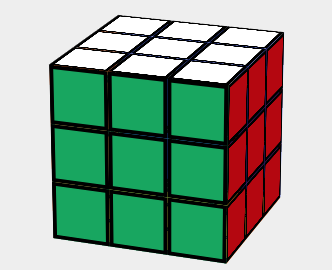

In [2]:
Image(filename = PATH + "/Cube.png", width=int(300), height=int(300))

We begin by labeling the $6$ sides of the cube as $\textit{F, L, U, B, R, D}$ which stand for the front side, left side, top side, back side, right side, and bottom side, respectively. We identify each side $A$ with the matrix 
$\begin{bmatrix} A_{i,j} \end{bmatrix}_{i,j=0}^{2}.$ Each entry $A_{i,j} \in \lbrace \text{g,o,w,b,r,y} \rbrace$ corresponds to the color of the $(i,j)$-th square. The matrices $\text{F, L, U, B, R, D}$ are together viewed as a $\textbf{colored cube configuration}.$ In particular, the $\textbf{identity configuration}$ is the particular configuration where $\text{F}$ has all entries $\text{g, }$ $\text{L}$ has all entries $\text{o, }$ $\cdots \ , $ and  $\text{D}$ has all entries $\text{y .}$ 



In [3]:
def face_names():
    return ['F','L','U','B','R','D']
def colors():
    return ['g','o','w','b','r','y']
def move_names():
    cw_moves=['F','L','U','B','R','D']
    ccw_moves=[str(i)+"'" for i in cw_moves]
    return cw_moves+ccw_moves

# Configurations

In this notebook, all configurations are in the form of a dictionary. The keys are the side names, and the values are their corresponding matrices.

The 'generic_config' method returns a configuration, where the side matrices have all distinct entries from $1$ to $54.$ We have used it to facilitate mathematical representations of rotations.

In [4]:
def generic_config():
    keys=face_names()
    values=[Matrix([list(range(9*j+1,9*j+10))]).reshape(3,3) for j in range(6)]
    return copy.deepcopy(dict(zip(keys,values)))   

The 'custom_config' method below returns a configuration, where the side matrices have customized entries. For example, one may choose to put in color strings as entries. The 'identity()' method returns the identity configuration. Do $\textbf{not}$ change the 'reverse_matrix()' method; the other methods depend on it.

In [5]:
def custom_config(front,left,up,back,right,down):
    keys=face_names()
    values=[front,left,up,back,right,down]
    return dict(zip(keys,values))

def identity():
    keys=face_names()
    values=[Matrix([[i for j in range(9)]]).reshape(3,3) for i in colors()]
    return dict(zip(keys,values))

def reverse_matrix():
    return Matrix([[0,0,1],[0,1,0],[1,0,0]])

Here is an example of setting up a custom colored configuration.

In [6]:
front=Matrix([['y','g','y'],['g','y','r'],['r','w','g']])
left=Matrix([['o','r','b'],['w','r','w'],['y','o','g']])
back=Matrix([['r','y','b'],['o','w','r'],['o','w','b']])
right=Matrix([['g','y','w'],['g','o','b'],['w','y','g']])
up=Matrix([['w','r','b'],['b','b','b'],['o','o','o']])
down=Matrix([['y','b','r'],['y','g','g'],['r','o','w']])
test_config=custom_config(front,left,up,back,right,down)

The 'display' method returns a net diagram of how the cube configuration would look in real life. We give an example of the 'test_config' defined above.

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

def display(config,use_colors=True,figsize=(10,10)):
    c_dict=dict(zip(colors(),range(6)))
    if(use_colors):
        F,L,U,B,R,D=[np.array([c_dict[str(item)] for item in config[face]]).reshape(3,3).astype(int) for face in face_names()]
    else:
        F,L,U,B,R,D=[np.array([item for item in config[face]]).reshape(3,3).astype(int) for face in face_names()]
    if (use_colors):
        grid=np.concatenate((L,F,R,B),axis=1)
        top=np.concatenate((6*np.ones([3,3]), U,6*np.ones([3,3]),6*np.ones([3,3])),axis=1)
        bottom=np.concatenate((6*np.ones([3,3]), D,6*np.ones([3,3]),6*np.ones([3,3])),axis=1)
        grid=np.concatenate((top,grid,bottom))
        fig,ax=plt.subplots(figsize=figsize)
        cmap = mpl.colors.ListedColormap(['green', 'orange','white','blue','red','yellow','black'], name='colors')
        ax.imshow(grid, cmap=cmap,vmin=0,vmax=7)
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-0.5, 11.5, 1));ax.set_yticks(np.arange(-0.5, 8.5, 1));
        ax.text(0.75, 4.25,'L',size=40,color='pink'); ax.text(3.75, 4.25,'F',size=40,color='pink'); 
        ax.text(6.75, 4.25,'R',size=40,color='pink'); ax.text(9.75, 4.25,'B',size=40,color='pink');
        ax.text(3.75, 1.25,'U',size=40,color='pink'); ax.text(3.75, 7.25,'D',size=40,color='pink');
        ax.set_xticklabels([]); ax.set_yticklabels([]);
        plt.close('all')
        return fig
    else:
        grid=np.concatenate((L,F,R,B),axis=1)
        top=np.concatenate((55*np.ones([3,3]), U,55*np.ones([3,3]),55*np.ones([3,3])),axis=1)
        bottom=np.concatenate((55*np.ones([3,3]), D,55*np.ones([3,3]),55*np.ones([3,3])),axis=1)
        grid=np.concatenate((top,grid,bottom))
        fig,ax=plt.subplots(figsize=figsize)
        cmap = mpl.colors.ListedColormap(54*['white']+['black'], name='colors')
        ax.imshow(grid, cmap=cmap,vmin=0,vmax=56)
        ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
        ax.set_xticks(np.arange(-0.5, 11.5, 1));ax.set_yticks(np.arange(-0.5, 8.5, 1));
        text_pos=dict(zip(['L','F','R','B','U','D'],[(0.75,4.25),(3.75,4.25),(6.75,4.25),
                                                     (9.75,4.25),(3.75,1.25),(3.75,7.25)]))
        for face in text_pos.keys():
            for i in range(3):
                for j in range(3):
                    x=text_pos[face][0]-1-0.15
                    y=text_pos[face][-1]-1
                    if(len(str(config[face].T[i,j]))==1):
                        x+=0.15
                    ax.text(x+i, y+j,str(config[face].T[i,j]),fontsize=30,color='black'); 
        ax.set_xticklabels([]); ax.set_yticklabels([]);
        plt.close('all')
        return fig

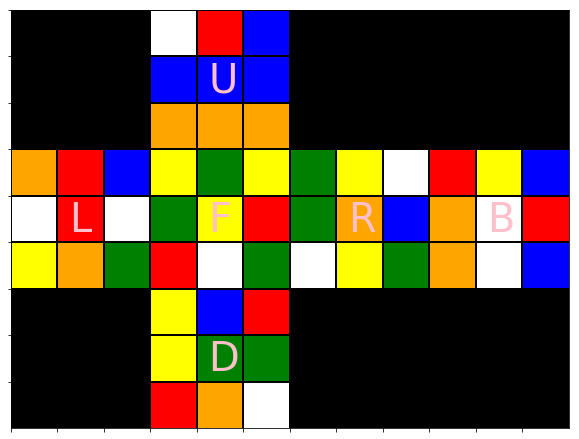

In [8]:
display(test_config,figsize=(10,10))

One can imagine how the $3D$ cube would look like upon folding all sides but $\text{F}$ towards the back of the screen.

# Movements

We define $\textbf{A}$ to stand for the operation to rotate side $A$ clockwise relative if one were to see the side $A$ directly in front in the actual cube. Similarly, we define $\textbf{A}'$ to stand for the operation to rotate side $A$ counterclockwise. The six methods are the clockwise rotations $\textbf{L},\textbf{R},\textbf{F},\textbf{B},\textbf{U},\textbf{D},$ respectively. 

In [9]:
def L(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,down_modified,back_modified,up_modified=[i.copy() for i in [front,down,back,up]]
    M=reverse_matrix()
    
    left_modified=left.T*M
    
    front_modified[:,0]=up[:,0] 
    down_modified[:,0]=front[:,0]
    back_modified[:,-1]=M*down[:,0]
    up_modified[:,0]=M*back[:,-1]
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back_modified,right,down_modified
    return dict(zip(keys,values))

In [10]:
def R(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,down_modified,back_modified,up_modified=[i.copy() for i in [front,down,back,up]]
    M=reverse_matrix()
    
    right_modified=right.T*M
    
    front_modified[:,-1]=down[:,-1] 
    up_modified[:,-1]=front[:,-1]
    back_modified[:,0]=M*up[:,-1]
    down_modified[:,-1]=M*back[:,0]
    
    keys=face_names()
    values=front_modified,left,up_modified,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


In [11]:
def F(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    up_modified,right_modified,down_modified,left_modified=[i.copy() for i in [up,right,down,left]]
    M=reverse_matrix()
    
    front_modified=front.T*M
    
    up_modified[-1,:]=left[:,-1].T*M 
    right_modified[:,0]=up[-1,:].T
    down_modified[0,:]=right[:,0].T*M
    left_modified[:,-1]=down[0,:].T
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back,right_modified,down_modified
    return dict(zip(keys,values))

In [12]:
def B(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    up_modified,right_modified,down_modified,left_modified=[i.copy() for i in [up,right,down,left]]
    M=reverse_matrix()
    
    back_modified=back.T*M
    
    up_modified[0,:]=right[:,-1].T
    left_modified[:,0]=M*up[0,:].T
    down_modified[-1,:]=left[:,0].T
    right_modified[:,-1]=M*down[-1,:].T
    
    keys=face_names()
    values=front,left_modified,up_modified,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


In [13]:
def U(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,left_modified,back_modified,right_modified=[i.copy() for i in [front,left,back,right]]
    M=reverse_matrix()
    up_modified=up.T*M
    
    front_modified[0,:]=right[0,:]
    left_modified[0,:]=front[0,:]
    back_modified[0,:]=left[0,:,]
    right_modified[0,:]=back[0,:,]
    
    keys=face_names()
    values=front_modified,left_modified,up_modified,back_modified,right_modified,down
    return dict(zip(keys,values))

In [14]:
def D(config=generic_config()):
    front,left,up,back,right,down=[config[face] for face in face_names()]
    front_modified,left_modified,back_modified,right_modified=[i.copy() for i in [front,left,back,right]]
    M=reverse_matrix()
    down_modified=down.T*M
    
    front_modified[-1,:]=left[-1,:]
    right_modified[-1,:]=front[-1,:]
    back_modified[-1,:]=right[-1,:]
    left_modified[-1,:]=back[-1,:]
    
    keys=face_names()
    values=front_modified,left_modified,up,back_modified,right_modified,down_modified
    return dict(zip(keys,values))


The 'rotate' method below accepts a move name as a string and a configuration. It then returns the resulting configuration upon doing the rotation. The 'rotate_sequence' accepts a list of move names and returns the final configuration upon doing the series of moves in the order presented by the list. 

In [15]:
def rotate(move,config=generic_config()):
    if(len(move)==0 or move is None or move=='Id'):
        return config
    move_dict={'L':L(config),
               'R':R(config),
               'U':U(config),
               'D':D(config),
               'F':F(config),
               'B':B(config),
               
               "L'":L(L(L(config))),
               "R'":R(R(R(config))),
               "U'":U(U(U(config))),
               "D'":D(D(D(config))),
               "F'":F(F(F(config))),
               "B'":B(B(B(config))),
              }
    return move_dict[move]

def rotate_sequence(moves,config=generic_config()):
    final_config=config
    moves=moves.split(" ")
    for move in moves:
        final_config=rotate(move,final_config)
    return final_config

We give an example on our 'test_config' if one were to do $\textbf{F}$ once, twice, and thrice.

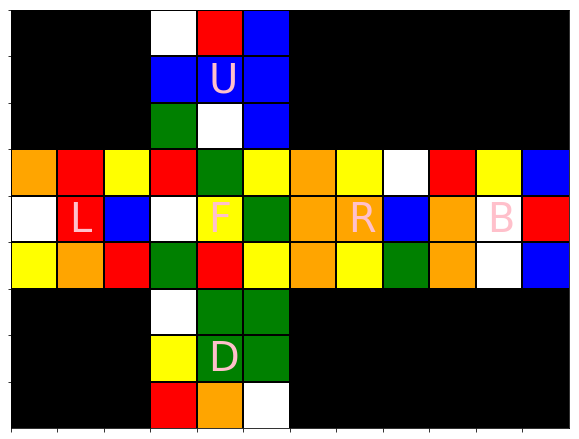

In [16]:
display(rotate('F',test_config))

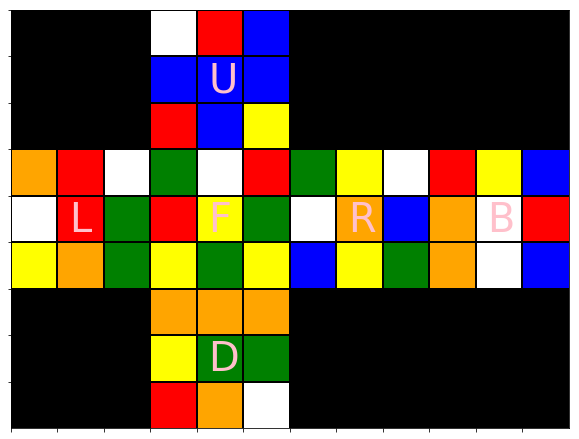

In [17]:
display(rotate_sequence('F F',test_config))

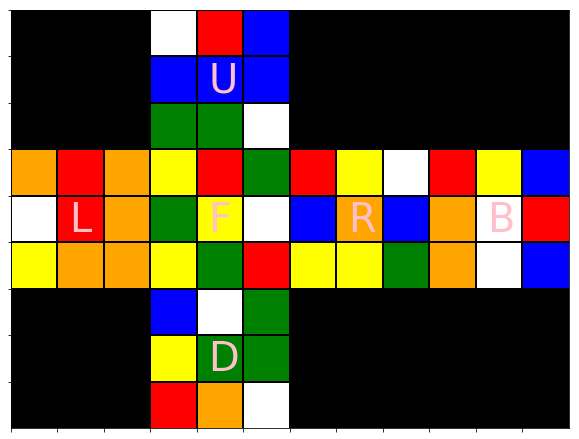

In [18]:
display(rotate_sequence('F F F ',test_config))

It should be true in real life that rotating the same face four times should recover the configuration we started with.

In [19]:
test_config==rotate_sequence('F F F F',test_config)

True

# The Rubik's Cube Group

In [20]:
import random
import string

def random_rotation(str_size=6):
    return ' '.join(random.choice(face_names()) for x in range(str_size))+ " "

Define $\mathcal{G}$ to be the set of all functions obtained by composing one or more of the elements from $\lbrace \textbf{F}, \textbf{L}, \textbf{U}, \textbf{B}, \textbf{R}, \textbf{D} \rbrace.$ We informally argue $\mathcal{G}$ is a group under composition.

## Closure

Granted to us by construction.

## Associativity

Let's see if our code shows that $(\textbf{M}_1 \circ \textbf{M}_2) \circ \textbf{M}_3=\textbf{M}_1 \circ (\textbf{M}_2 \circ \textbf{M}_3),$ where $\textbf{M}_1, \textbf{M}_2, \textbf{M}_3 \in \mathcal{G}$ are arbitrary.

In [21]:
move1,move2,move3=random_rotation(),random_rotation(),random_rotation()
rotate_sequence(move3,rotate_sequence(move1+ move2,test_config))==rotate_sequence(move2+move3,rotate_sequence(move1,test_config))

True

## Existence of Identity

We already saw that $\textbf{F}^4$ is the identity map. In fact, $\textbf{Id}=\textbf{M}^4$ for any $\textbf{M}$ that is a single rotation. We check this.

In [22]:
[rotate_sequence(' '.join(face for i in range(4)),test_config)==test_config for face in face_names()]

[True, True, True, True, True, True]

## Existence of Inverses

We show that for any arbitrary $\mathbf{M} \in \mathcal{G}$ with $\mathbf{M}=\mathbf{M}_1  \ \circ \dots \ \circ \mathbf{M}_n,$ where each $\textbf{M}_i$ is a simple clockwise rotation, then its inverse is $\mathbf{M'}_n  \ \circ \dots \ \circ \mathbf{M'}_1$ 
In particular, we check if $\textbf{M} \circ \textbf{M'}=\textbf{M'} \circ \textbf{M}=\textbf{Id}.$  

In [23]:
move=random_rotation()
inverse_move=' '.join(i+"'" for i in reversed(move.replace(' ','')))+" "

[rotate_sequence(move+inverse_move,test_config)==test_config, 
rotate_sequence(inverse_move+move,test_config)==test_config]

[True, True]

## Just For Fun

Is $\mathcal{G}$ abelian ?

In [24]:
move1,move2=random_rotation(),random_rotation();
rotate_sequence(move1+move2,test_config)==rotate_sequence(move2+move1,test_config)

False

What is the order of $\textbf{L} \circ \textbf{R}$ ?

In [25]:
n=1
move="L R"
config=rotate_sequence(move,test_config)
while(config!=test_config):
    config=rotate_sequence(move,config)
    n+=1
n

4

What is the order of $\textbf{L} \circ \textbf{F}$ ?

In [26]:
n=1
move="L F"
config=rotate_sequence(move,test_config)
while(config!=test_config):
    config=rotate_sequence(move,config)
    n+=1
n

105

In fact, if $M_i$ and $M_j$ are not adjacent sides, then $\textbf{M}_i \circ \textbf{M}_j$ has order $4.$ This makes sense because rotating one face does not impact the other. On the other hand, if these sides are adjacent, then $\textbf{M}_i \circ \textbf{M}_j$ has order $105.$

# A Group Isomorphism

We wonder if there is another group that exhibits the properties of $\mathcal{G}$ ? It turns out, yes. It is a particular subgroup of $S_{54}.$ The following code generates this permutation subgroup, which we call $\mathcal{S}.$ In particular, we took the 'generic_config' configuration from earlier and concatenated the resulting side matrices from a clockwise rotation into a list. Then, we asked SageMath to convert this list into a composition of permutation cycles.

In [27]:
S=PermutationGroup([[rotate(move)[key][i,j] for key in face_names() for i in range(3) for j in range(3)] for move in move_names()[:6]])

We look at the particular generators of this group.

In [28]:
S

Permutation Group with generators [(10,21,45,52)(13,20,42,53)(16,19,39,54)(28,34,36,30)(29,31,35,33), (7,16,34,43)(8,17,35,44)(9,18,36,45)(46,52,54,48)(47,49,53,51), (3,48,34,21)(6,51,31,24)(9,54,28,27)(37,43,45,39)(38,40,44,42), (1,7,9,3)(2,4,8,6)(12,46,43,27)(15,47,40,26)(18,48,37,25), (1,19,36,46)(4,22,33,49)(7,25,30,52)(10,16,18,12)(11,13,17,15), (1,37,28,10)(2,38,29,11)(3,39,30,12)(19,25,27,21)(20,22,26,24)]

Observe that each generator consists of a composition of $5$ disjoint cycles each of length $4.$ Hence $20$ elements in $\lbrace 1, \ \dots \ , 54 \rbrace$ are moved when applying a generator permutation. This makes sense because whenever we do a clockwise rotation, $20$ total squares must change value. Note upon applying a clockwise or counterclockwise rotation $\textbf{M},$ there are $8$ squares on the side $M$ (all but the middle) that get shuffled around. In addition, there are $4$ adjacent sides to $M,$ each having exactly $3$ squares change value. Hence there are $12+8=20$ squares that change values in all.

We check the order of this group $\mathcal{S}.$

In [29]:
S.order().factor()

2^27 * 3^14 * 5^3 * 7^2 * 11

This in fact turns out to be the order of $\mathcal{G}$ according to Wikipedia.

Its not abelian either.

In [30]:
S.is_abelian()

False

Furthermore, any generator $s \in \mathcal{S}$ has the property that $s^4=\text{Id}$ and $s^{-1}=s^3.$

In [31]:
[(S.gen(i)*S.gen(i)*S.gen(i)*S.gen(i) ==S.identity(), S.gen(i).inverse()==S.gen(i)*S.gen(i)*S.gen(i)) for i in range(6)]

[(True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True),
 (True, True)]

We check the order of subgroups for any composition of distinct generators with length $2.$

In [32]:
list(set([PermutationGroup([S.gen(i)*S.gen(j)]).order() for i in range(6) for j in range(6) if i!=j]))

[105, 4]

This confirms what we said earlier about compositions of clockwise rotations with length $2$ either being $4$ or $105$ depending on the respective sides being adjacent or not.